# Introduction
The sinking of Titanic is one of the most notorious shipwrecks in the history. In 1912, during her voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew.

In [490]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

import seaborn as sns

pd.set_option('display.max_columns', None)

<a id = "1"></a><br>
# Load and Check Data

In [491]:
df = pd.read_csv("datasets/titanic.csv")

In [492]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [493]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [494]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [495]:
df.shape

(891, 12)

In [496]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [497]:
df.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [498]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<a id = "2"></a><br>
# Variable Description
1. PassengerId: unique id number to each passenger
1. Survived: passenger survive(1) or died(0)
1. Pclass: passenger class
1. Name: name
1. Sex: gender of passenger 
1. Age: age of passenger 
1. SibSp: number of siblings/spouses
1. Parch: number of parents/children 
1. Ticket: ticket number 
1. Fare: amount of money spent on ticket
1. Cabin: cabin category
1. Embarked: port where passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton)


In [499]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* float64(2): Fare ve Age
* int64(5): Pclass, sibsp, parch, passengerId and survived
* object(5): Cabin, embarked, ticket, name and sex

<a id = "3"></a><br>
# Univariate Variable Analysis
* Categorical Variable: Survived, Sex, Pclass, Embarked, Cabin, Name, Ticket, Sibsp and Parch
* Numerical Variable: Fare, age and passengerId

In [500]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<a id = "4"></a><br>
## Categorical Variable

In [501]:
df_sex = df['Sex'].value_counts()
df_sex

male      577
female    314
Name: Sex, dtype: int64

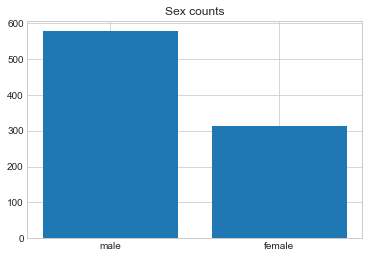

In [502]:
plt.bar(df_sex.index, df_sex.values)
plt.title('Sex counts')
plt.show()

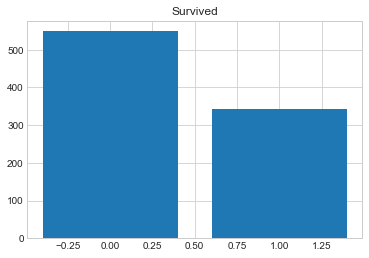

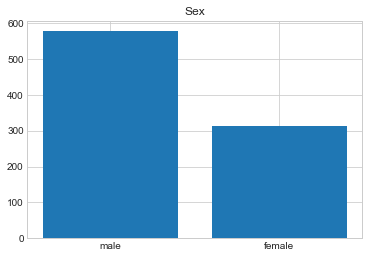

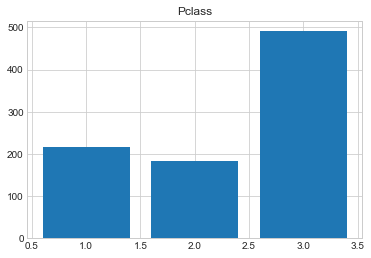

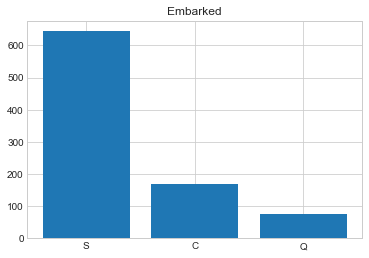

In [503]:
for col in ['Survived', 'Sex', 'Pclass', 'Embarked']:
    
    df_sex = df[col].value_counts()

    plt.bar(df_sex.index, df_sex.values)
    plt.title(col)
    plt.show()

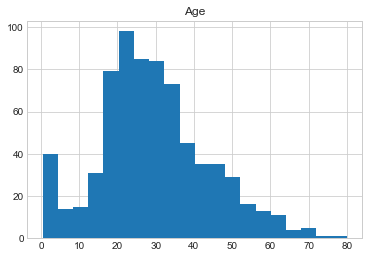

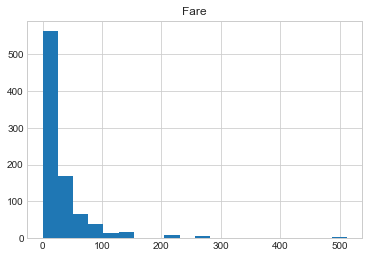

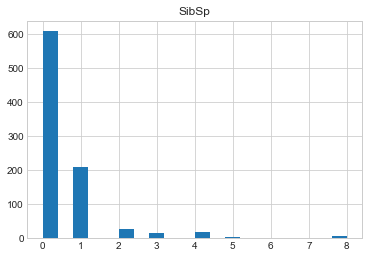

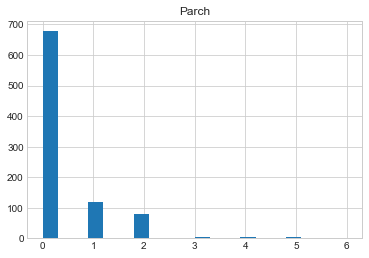

In [504]:
for col in ['Age', 'Fare', 'SibSp', 'Parch']:
    
    #df_sex = df[col].value_counts()

    plt.hist(df[col], bins=20)
    plt.title(col)
    plt.show()

<a id = "6"></a><br>
# Basic Data Analysis
* Pclass - Survived
* Sex - Survived
* SibSp - Survived
* Parch - Survived

In [505]:
df[["Sex","Survived"]].groupby("Sex", as_index = False).mean().sort_values(by="Survived",ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [506]:
# Plcass vs Survived
df[["Pclass","Survived"]].groupby(["Pclass"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


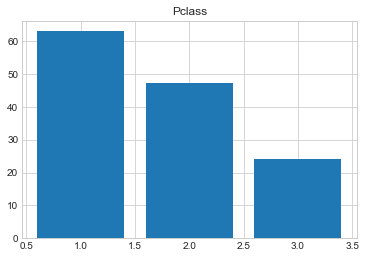

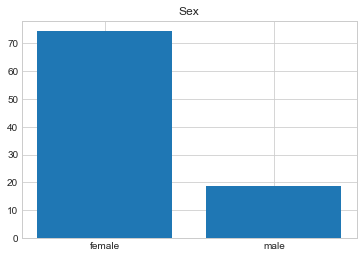

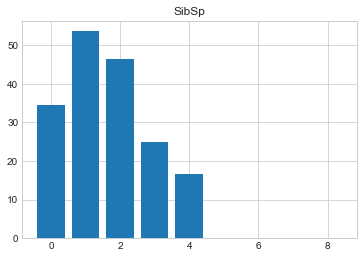

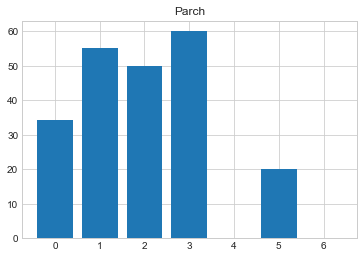

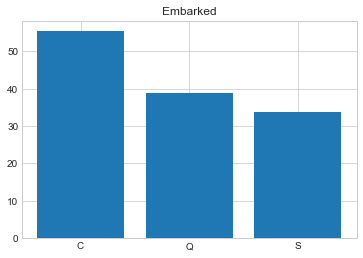

In [575]:
for col in ['Pclass','Sex','SibSp','Parch','Embarked']:
    df_gr = df[[col,"Survived"]].groupby([col], as_index = False).mean().sort_values(by="Survived",ascending = False)
    plt.bar(df_gr[col], df_gr['Survived']*100)
    plt.title(col)
    plt.show()

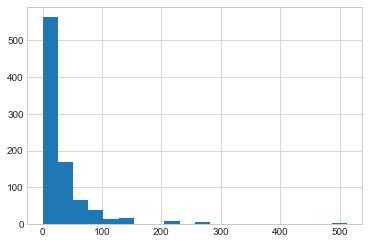

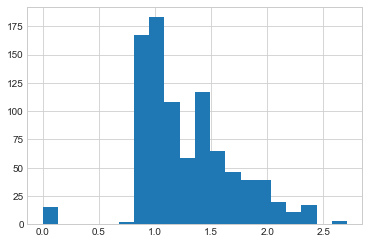

In [508]:
df['Fare_log'] = np.log10(df['Fare'] + 1)

plt.hist(df['Fare'],bins=20)
plt.show()

plt.hist(df['Fare_log'],bins=20)
plt.show()

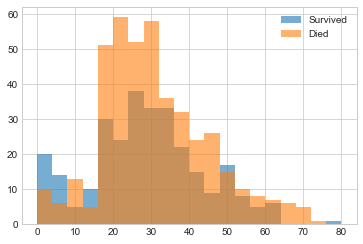

In [509]:
df_s = df[df['Survived'] == 1]
df_d = df[df['Survived'] == 0]

bins = np.linspace(0,80,21)

plt.hist(df_s['Age'],alpha=0.6, label='Survived', bins=bins)
plt.hist(df_d['Age'],alpha=0.6, label='Died', bins=bins)

plt.legend()
plt.show()

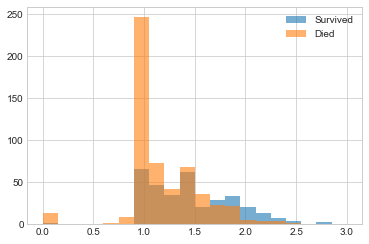

In [510]:
bins = np.linspace(0,3,21)

plt.hist(df_s['Fare_log'],alpha=0.6, label='Survived', bins=bins)
plt.hist(df_d['Fare_log'],alpha=0.6, label='Died', bins=bins)

plt.legend()
plt.show()

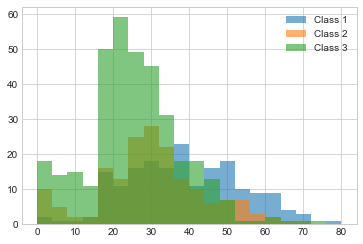

In [511]:
df_1 = df[df['Pclass'] == 1]
df_2 = df[df['Pclass'] == 2]
df_3 = df[df['Pclass'] == 3]

bins = np.linspace(0,80,21)

plt.hist(df_1['Age'],alpha=0.6, label='Class 1', bins=bins)
plt.hist(df_2['Age'],alpha=0.6, label='Class 2', bins=bins)
plt.hist(df_3['Age'],alpha=0.6, label='Class 3', bins=bins)

plt.legend()
plt.show()

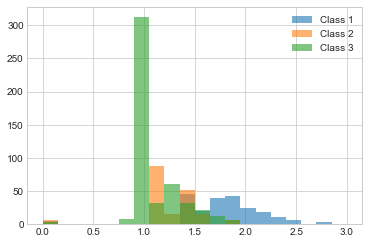

In [512]:
df_1 = df[df['Pclass'] == 1]
df_2 = df[df['Pclass'] == 2]
df_3 = df[df['Pclass'] == 3]

bins = np.linspace(0,3,21)

plt.hist(df_1['Fare_log'],alpha=0.6, label='Class 1', bins=bins)
plt.hist(df_2['Fare_log'],alpha=0.6, label='Class 2', bins=bins)
plt.hist(df_3['Fare_log'],alpha=0.6, label='Class 3', bins=bins)

plt.legend()
plt.show()

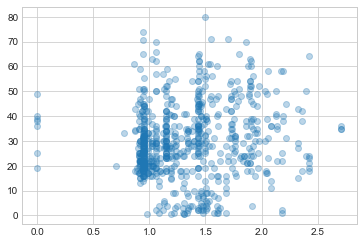

In [513]:
plt.scatter(df['Fare_log'],df['Age'], alpha=0.3);

# Dummy Variables - One-Hot-Encoding

In [514]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_log
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.916454
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C,1.859038
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.950608


In [515]:
df = pd.get_dummies(df, columns=['Embarked'], dummy_na=True)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Fare_log,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0.916454,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,1.859038,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.950608,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1.733197,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0.956649,0,0,1,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,0.975813,0,1,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,1.723148,0,0,1,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,1.343901,0,0,1,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,1.083979,0,0,1,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,1.492352,1,0,0,0


<a id = "7"></a><br>
# Outlier Detection

In [516]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 3
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)

    outlier_indices = pd.Series(outlier_indices).value_counts()
    outlier_indices = outlier_indices[outlier_indices >= 2].index
    
    return outlier_indices

In [517]:
outlier_indices = detect_outliers(df,["Age","SibSp","Parch","Fare_log"])

In [518]:
df.loc[outlier_indices]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Fare_log,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.90,NaN,1.680336,0,0,1,0
480,481,0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.90,NaN,1.680336,0,0,1,0
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.90,NaN,1.680336,0,0,1,0
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,1.848497,0,0,1,0
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,1.848497,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.90,NaN,1.680336,0,0,1,0
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,1.848497,0,0,1,0
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,1.848497,0,0,1,0
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,1.848497,0,0,1,0


In [519]:
# drop outliers
#df = df.drop(detect_outliers(df,["Age","SibSp","Parch","Fare"]),axis = 0).reset_index(drop = True)

<a id = "8"></a><br>
# Missing Value
* Find Missing Value
* Fill Missing Value

In [520]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    object 
 5   Age           714 non-null    float64
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Fare          891 non-null    float64
 10  Cabin         204 non-null    object 
 11  Fare_log      891 non-null    float64
 12  Embarked_C    891 non-null    uint8  
 13  Embarked_Q    891 non-null    uint8  
 14  Embarked_S    891 non-null    uint8  
 15  Embarked_nan  891 non-null    uint8  
dtypes: float64(3), int64(5), object(4), uint8(4)
memory usage: 87.1+ KB


<a id = "9"></a><br>
## Find Missing Value

In [521]:
df.columns[df.isnull().any()]

Index(['Age', 'Cabin'], dtype='object')

In [522]:
df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             177
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Fare_log          0
Embarked_C        0
Embarked_Q        0
Embarked_S        0
Embarked_nan      0
dtype: int64

In [523]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Fare_log,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0.916454,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,1.859038,1,0,0,0


<a id = "10"></a><br>
## Fill Missing Value

* We saw that Age is an important feature. How can we estimate it?

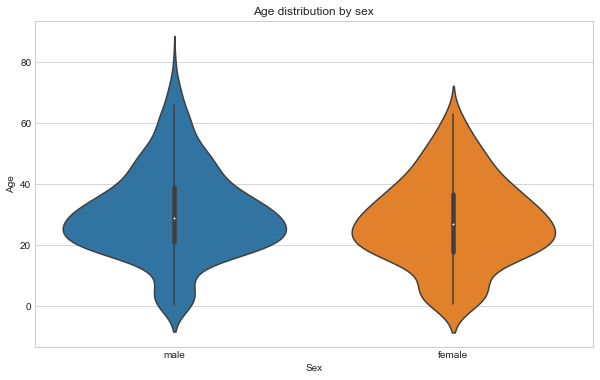

In [524]:
fig = plt.figure(figsize=(10,6))
sns.violinplot(data=df, x='Sex', y='Age')
plt.title('Age distribution by sex')
plt.show()

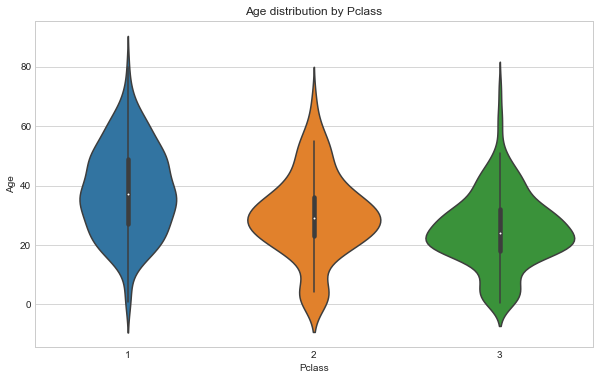

In [525]:
fig = plt.figure(figsize=(10,6))
sns.violinplot(data=df, x='Pclass', y='Age')
plt.title('Age distribution by Pclass')
plt.show()

Fill Nans found in the Age column with the mean corresponding to the Pclass age mean value.

In [526]:
age_mean_pclass_1 = df.loc[df['Pclass'] == 1, 'Age'].mean()
age_mean_pclass_2 = df.loc[df['Pclass'] == 2, 'Age'].mean()
age_mean_pclass_3 = df.loc[df['Pclass'] == 3, 'Age'].mean()

In [527]:
print(round(age_mean_pclass_1),round(age_mean_pclass_2),round(age_mean_pclass_3))

38 30 25


In [528]:
df.loc[(df['Age'].isna()) & (df['Pclass'] == 1), 'Age'] = age_mean_pclass_1
df.loc[(df['Age'].isna()) & (df['Pclass'] == 2), 'Age'] = age_mean_pclass_2
df.loc[(df['Age'].isna()) & (df['Pclass'] == 3), 'Age'] = age_mean_pclass_3

In [529]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    object 
 5   Age           891 non-null    float64
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Fare          891 non-null    float64
 10  Cabin         204 non-null    object 
 11  Fare_log      891 non-null    float64
 12  Embarked_C    891 non-null    uint8  
 13  Embarked_Q    891 non-null    uint8  
 14  Embarked_S    891 non-null    uint8  
 15  Embarked_nan  891 non-null    uint8  
dtypes: float64(3), int64(5), object(4), uint8(4)
memory usage: 87.1+ KB


<a id = "11"></a><br>
# Visualization

In [530]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Fare_log,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
PassengerId,1.000000e+00,-0.005007,-0.035144,0.035256,-0.057527,-0.001652,0.012658,-0.007425,-0.001205,-0.033606,0.022148,-6.756184e-19
Survived,-5.006661e-03,1.000000,-0.338481,-0.050504,-0.035322,0.081629,0.257307,0.329862,0.168240,0.003650,-0.155660,6.009485e-02
Pclass,-3.514399e-02,-0.338481,1.000000,-0.403858,0.083081,0.018443,-0.549500,-0.661022,-0.243292,0.221009,0.081720,-7.428233e-02
Age,3.525601e-02,-0.050504,-0.403858,1.000000,-0.243452,-0.175799,0.120886,0.140820,0.042064,-0.070315,-0.000483,7.438881e-02
SibSp,-5.752683e-02,-0.035322,0.083081,-0.243452,1.000000,0.414838,0.159651,0.318528,-0.059528,-0.026354,0.070941,-2.250825e-02
...,...,...,...,...,...,...,...,...,...,...,...,...
Fare_log,-7.425264e-03,0.329862,-0.661022,0.140820,0.318528,0.332186,0.787543,1.000000,0.262341,-0.160456,-0.135938,7.014024e-02
Embarked_C,-1.204795e-03,0.168240,-0.243292,0.042064,-0.059528,-0.011069,0.269335,0.262341,1.000000,-0.148258,-0.778359,-2.286386e-02
Embarked_Q,-3.360570e-02,0.003650,0.221009,-0.070315,-0.026354,-0.081228,-0.117216,-0.160456,-0.148258,1.000000,-0.496624,-1.458805e-02
Embarked_S,2.214778e-02,-0.155660,0.081720,-0.000483,0.070941,0.063036,-0.166603,-0.135938,-0.778359,-0.496624,1.000000,-7.658762e-02


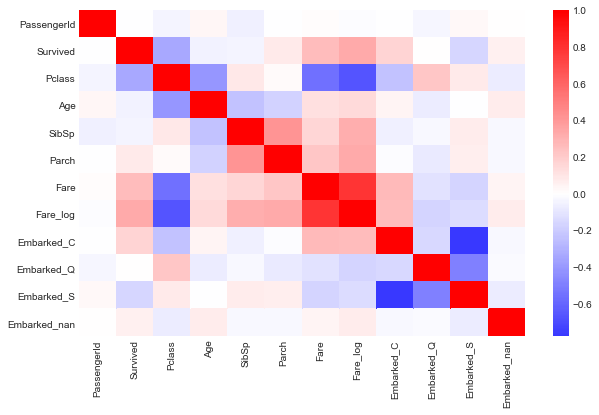

In [531]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), center=0, cmap='bwr')
plt.show()

The feature Age doesn't seem to be correlated with the target Survived. However, we saw previously that the age was, in fact, a factor. Why does this happen?

<a id = "22"></a><br>
## Feature Engineering

Let's create a new feature called Age_priority, that will tell us if a person's age makes it so they have priority when evacuating. This variable will be:

- True: the person has priority. It's the case for children under 14 and elder people over 50.
- False: everyone else.

In [532]:
df['Age_priority'] = (df['Age'] < 14) | (df['Age'] > 70)

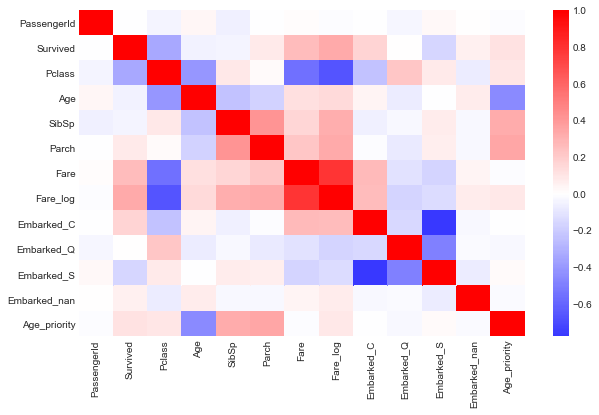

In [533]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), center=0, cmap='bwr')
plt.show()

Now there is a correlation between Age and Survived.

Now, we can try to create a unique column joining the Parch and SibSp columns, making a Family_size column.

In [534]:
df['Family_size'] = df['SibSp'] + df['Parch'] + 1

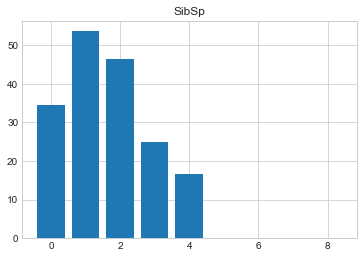

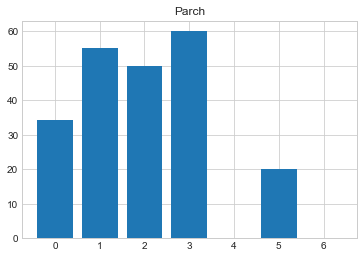

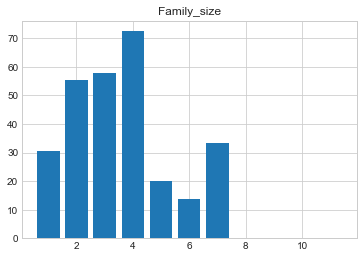

In [535]:
for col in ['SibSp','Parch','Family_size']:
    df_gr = df[[col,"Survived"]].groupby([col], as_index = False).mean().sort_values(by="Survived",ascending = False)
    plt.bar(df_gr[col], df_gr['Survived']*100)
    plt.title(col)
    plt.show()

We could build a new feature:

- Big_family: where the family has 5 or more members

In [536]:
df['Big_family'] = df['Family_size'] >= 5

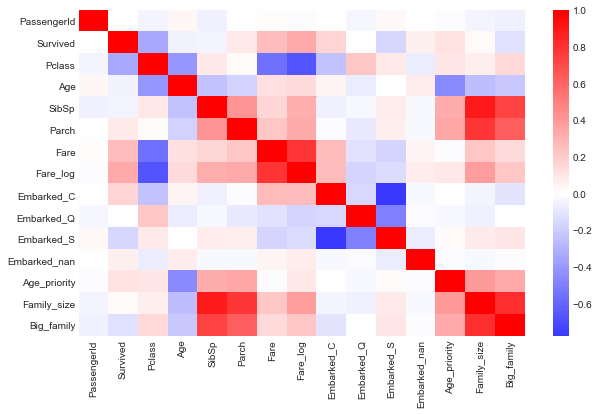

In [537]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), center=0, cmap='bwr')
plt.show()

In [538]:
df['Name'].head(3)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
Name: Name, dtype: object

We could now focus on the Name column. At first sight, we might think that there's not a lot of info we could get from there, however, we have the title in the name.

In [539]:
name = 'Braund, Mr. Owen Harris'
name

'Braund, Mr. Owen Harris'

In [540]:
name.split(', ')[1].split('.')[0]

'Mr'

In [541]:
df['Title'] = df['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Fare_log,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan,Age_priority,Family_size,Big_family,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0.916454,0,0,1,0,False,2,False,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,1.859038,1,0,0,0,False,2,False,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.950608,0,0,1,0,False,1,False,Miss


In [542]:
df['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [543]:
df['Is_Married'] = df['Title'] == 'Mrs'
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Fare_log,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan,Age_priority,Family_size,Big_family,Title,Is_Married
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0.916454,0,0,1,0,False,2,False,Mr,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,1.859038,1,0,0,0,False,2,False,Mrs,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.950608,0,0,1,0,False,1,False,Miss,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1.733197,0,0,1,0,False,2,False,Mrs,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0.956649,0,0,1,0,False,1,False,Mr,False


In [544]:
df['Name_len'] = df['Name'].str.len()
df.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Fare_log,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan,Age_priority,Family_size,Big_family,Title,Is_Married,Name_len
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0.916454,0,0,1,0,False,2,False,Mr,False,23
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,1.859038,1,0,0,0,False,2,False,Mrs,True,51
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.950608,0,0,1,0,False,1,False,Miss,False,22
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1.733197,0,0,1,0,False,2,False,Mrs,True,44


In [545]:
df['Title'] = df['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')
df['Title'] = df['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')

In [546]:
df['Title'].value_counts()

Mr                          517
Miss/Mrs/Ms                 313
Master                       40
Dr/Military/Noble/Clergy     21
Name: Title, dtype: int64

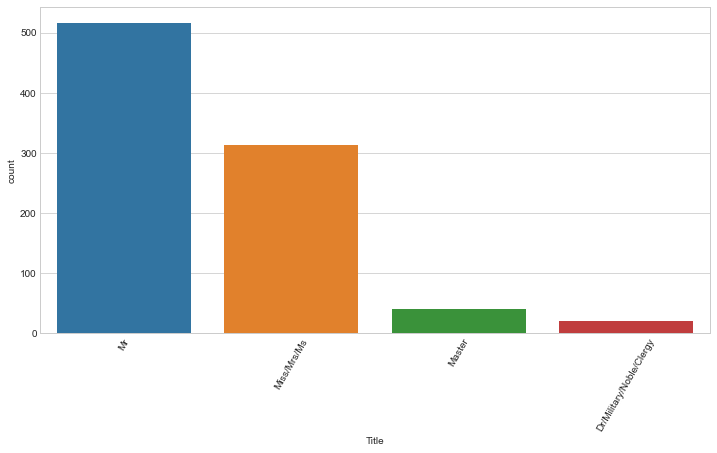

In [547]:
plt.figure(figsize=(12,6))
sns.countplot(x="Title", data = df)
plt.xticks(rotation = 60)
plt.show()

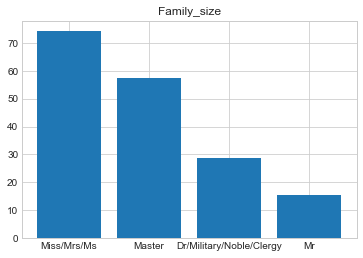

In [548]:
df_gr = df[['Title',"Survived"]].groupby('Title', as_index = False).mean().sort_values(by="Survived",ascending = False)
plt.bar(df_gr['Title'], df_gr['Survived']*100)
plt.title(col)
plt.show()

In [549]:
df = pd.get_dummies(df,columns=["Title"])
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Fare_log,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan,Age_priority,Family_size,Big_family,Is_Married,Name_len,Title_Dr/Military/Noble/Clergy,Title_Master,Title_Miss/Mrs/Ms,Title_Mr
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0.916454,0,0,1,0,False,2,False,False,23,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,1.859038,1,0,0,0,False,2,False,True,51,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.950608,0,0,1,0,False,1,False,False,22,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1.733197,0,0,1,0,False,2,False,True,44,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0.956649,0,0,1,0,False,1,False,False,24,0,0,0,1


Lastly, we convert the Sex column to a numericalvariable.

In [550]:
df['Sex'].map({'male':0, 'female':1})

0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     1
15     1
16     0
17     0
18     1
19     1
20     0
21     0
22     1
23     0
24     1
25     1
26     0
27     0
28     1
29     0
30     0
31     1
32     1
33     0
34     0
35     0
36     0
37     0
38     1
39     1
40     1
41     1
42     0
43     1
44     1
45     0
46     0
47     1
48     0
49     1
50     0
51     0
52     1
53     1
54     0
55     0
56     1
57     0
58     1
59     0
60     0
61     1
62     0
63     0
64     0
65     0
66     1
67     0
68     1
69     0
70     0
71     1
72     0
73     0
74     0
75     0
76     0
77     0
78     0
79     1
80     0
81     0
82     1
83     0
84     1
85     1
86     0
87     0
88     1
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     0
98     1
99     0
100    1
101    0
102    0
103    0
104    0
105    0
106    1
107    0
108    0
109    1
110    0
1

In [552]:
df['Sex'] == 'female'

0      False
1       True
2       True
3       True
4      False
5      False
6      False
7      False
8       True
9       True
10      True
11      True
12     False
13     False
14      True
15      True
16     False
17     False
18      True
19      True
20     False
21     False
22      True
23     False
24      True
25      True
26     False
27     False
28      True
29     False
30     False
31      True
32      True
33     False
34     False
35     False
36     False
37     False
38      True
39      True
40      True
41      True
42     False
43      True
44      True
45     False
46     False
47      True
48     False
49      True
50     False
51     False
52      True
53      True
54     False
55     False
56      True
57     False
58      True
59     False
60     False
61      True
62     False
63     False
64     False
65     False
66      True
67     False
68      True
69     False
70     False
71      True
72     False
73     False
74     False
75     False
76     False

In [556]:
pd.get_dummies(df, columns=['Sex'], drop_first=True)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Fare_log,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan,Age_priority,Family_size,Big_family,Is_Married,Name_len,Title_Dr/Military/Noble/Clergy,Title_Master,Title_Miss/Mrs/Ms,Title_Mr,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.00000,1,0,A/5 21171,7.2500,NaN,0.916454,0,0,1,0,False,2,False,False,23,0,0,0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",38.00000,1,0,PC 17599,71.2833,C85,1.859038,1,0,0,0,False,2,False,True,51,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.00000,0,0,STON/O2. 3101282,7.9250,NaN,0.950608,0,0,1,0,False,1,False,False,22,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.00000,1,0,113803,53.1000,C123,1.733197,0,0,1,0,False,2,False,True,44,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",35.00000,0,0,373450,8.0500,NaN,0.956649,0,0,1,0,False,1,False,False,24,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.00000,0,0,211536,13.0000,NaN,1.146128,0,0,1,0,False,1,False,False,21,1,0,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.00000,0,0,112053,30.0000,B42,1.491362,0,0,1,0,False,1,False,False,28,0,0,1,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",25.14062,1,2,W./C. 6607,23.4500,NaN,1.388279,0,0,1,0,False,4,False,False,40,0,0,1,0,0
889,890,1,1,"Behr, Mr. Karl Howell",26.00000,0,0,111369,30.0000,C148,1.491362,1,0,0,0,False,1,False,False,21,0,0,0,1,1


In [557]:
df["Sex"] = df['Sex'].map({'male':0, 'female':1})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Fare_log,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan,Age_priority,Family_size,Big_family,Is_Married,Name_len,Title_Dr/Military/Noble/Clergy,Title_Master,Title_Miss/Mrs/Ms,Title_Mr
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.916454,0,0,1,0,False,2,False,False,23,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",1,38.0,1,0,PC 17599,71.2833,C85,1.859038,1,0,0,0,False,2,False,True,51,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.950608,0,0,1,0,False,1,False,False,22,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1.733197,0,0,1,0,False,2,False,True,44,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.956649,0,0,1,0,False,1,False,False,24,0,0,0,1


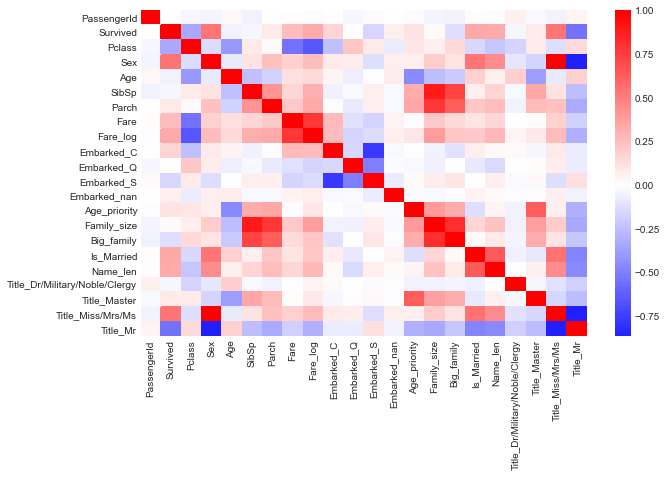

In [558]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), center=0, cmap='bwr')
plt.show()

## Categorical Encodings

We can encode the categorical variables in many ways, not only with a One-Hot-Encoder. Although there's more options, here we show:

- Count/frecuency encoding: changes a category by the amount of times/frequency with which it appears.
- Mean target encoding: the mean value of the target for each category.

In [568]:
df = pd.read_csv("datasets/titanic.csv")

In [569]:
# Count encoding
embarked_dict = df['Embarked'].value_counts().to_dict()
embarked_dict

{'S': 644, 'C': 168, 'Q': 77}

In [570]:
df['Embarked_count'] = df['Embarked'].map(embarked_dict)
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_count
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,644.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C,168.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,644.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,644.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,644.0


In [571]:
# Frequency encoding
embarked_dict = (df['Embarked'].value_counts() / len(df) * 100).to_dict()
embarked_dict

{'S': 72.27833894500561, 'C': 18.855218855218855, 'Q': 8.641975308641975}

In [572]:
df['Embarked_freq'] = df['Embarked'].map(embarked_dict)
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_count,Embarked_freq
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,644.0,72.278339
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C,168.0,18.855219
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,644.0,72.278339
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,644.0,72.278339
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,644.0,72.278339


In [574]:
# Mean target encoding
embarked_dict = (df[['Embarked','Survived']].groupby('Embarked')['Survived'].mean()*100).to_dict()
embarked_dict

{'C': 55.35714285714286, 'Q': 38.961038961038966, 'S': 33.69565217391305}

In [576]:
df['Embarked_mte'] = df['Embarked'].map(embarked_dict)
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_count,Embarked_freq,Embarked_mte
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,644.0,72.278339,33.695652
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C,168.0,18.855219,55.357143
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,644.0,72.278339,33.695652
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,644.0,72.278339,33.695652
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,644.0,72.278339,33.695652
